___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

![image.png](https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">Pandas Recap Lesson, Session-01</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">Groupby(), Map(), Apply(), Applymap() & Transform()</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">CONTENT</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [THE MAP() METHOD](#1)
* [THE APPLY() METHOD](#2)
* [THE APPLYMAP() METHOD](#3)
* [COMBINING LAMBDA FUNCTION WITH APPLY()](#4)
* [THE TRANSFORM() METHOD](#5)
* [THE APPLICATION OF TRANSFORM() & APPLY() METHODS WITH GROUPBY() TO REAL WORLD DATASET](#6)
* [The End of the Recap Session](#7)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

When working with Seaborn, we can either use one of the built-in datasets that Seaborn offers or we can load a Pandas DataFrame. Seaborn is part of the PyData stack hence accepts Pandas' data structures. Let us begin by importing few built-in datasets but before that we shall import few other libraries as well that our Seaborn would depend upon:

In [99]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

import warnings
warnings.filterwarnings('ignore') 

np.random.seed(42)

In [100]:
# from sklearn.datasets import load_iris

# data = load_iris()
# features = pd.DataFrame(data = data['data'], columns=data['feature_names'])
# features.head() #glance at the data 

In [101]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [102]:
df0 = sns.load_dataset("iris") #this is the original dataset
df = df0.copy() #create a copy to keep original dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [103]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Iris dataset actually has 50 samples from each of three species of Iris flower (Setosa, Virginica and Versicolor). Four (4) features were measured (in centimeters) from each sample: Length and Width of the Sepals and Petals For More Information you can visit [SOURCE01](https://en.wikipedia.org/wiki/Iris_flower_data_set), [SOURCE02](https://github.com/mwaskom/seaborn-data) & [SOURCE03](http://seaborn.pydata.org/).

Let us try to have a summarized view of this dataset:

In [104]:
df.describe() #returns numerical values of informations in boxplot

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**.describe()** is a very useful method in Pandas as it generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset distribution, excluding NaN values. 

In [105]:
df.isnull() #returns boolean values

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [106]:
df.isnull().sum() #returns sum of boolean values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [107]:
df.info()
#returns informations about dataset
#returns Dtype information about columns
#returns range of dataset
#returns how many non-nulls in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Without getting in-depth into analysis here, let us try to plot something simple from this dataset:

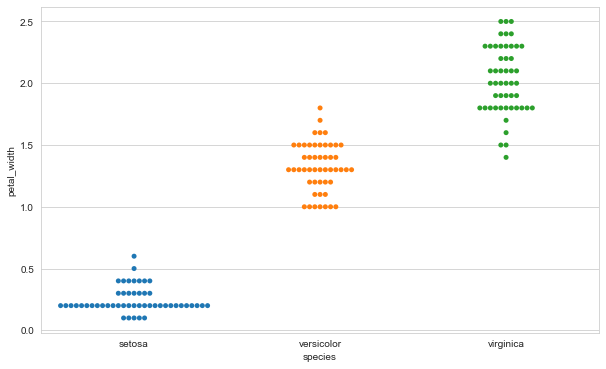

In [108]:
plt.figure(figsize=(10, 6))

sns.set_style("whitegrid")
sns.swarmplot(x="species", y="petal_width", data=df);
#what is the difference between swormplot and spritplot? (overlapping)

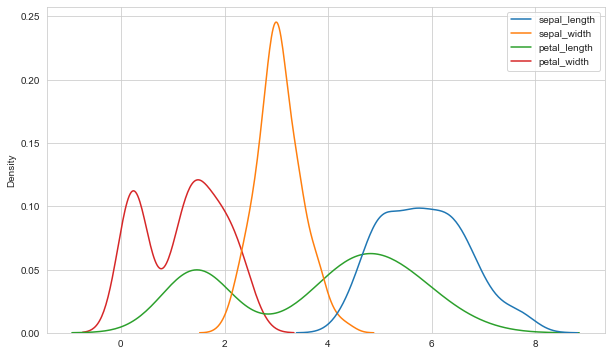

In [109]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df);

In [110]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


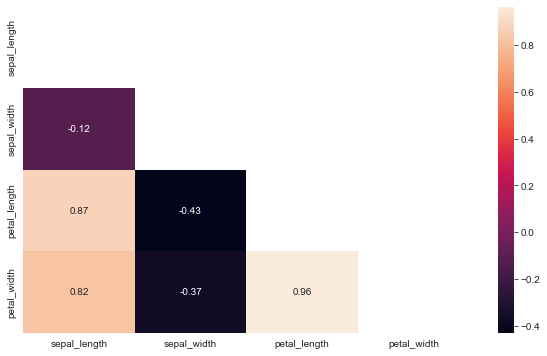

In [111]:
plt.figure(figsize=(10, 6))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix);

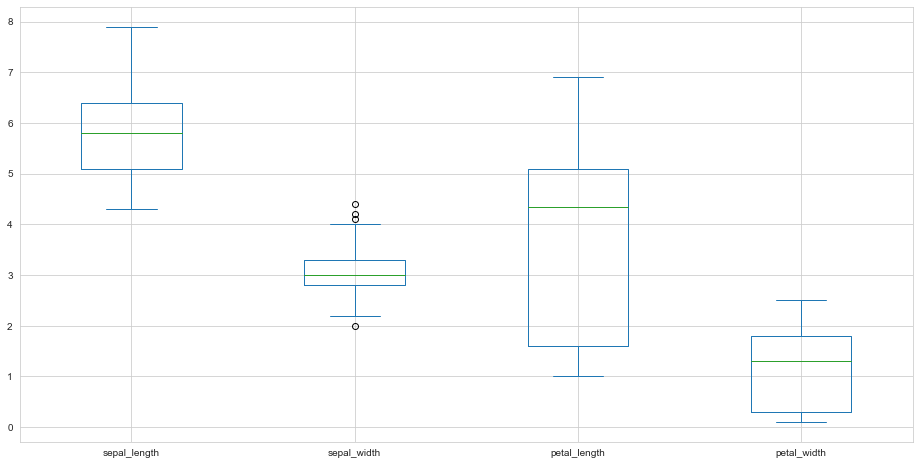

In [112]:
df.plot.box(figsize=(16, 8));

![image.png](https://i.ibb.co/rMp64hf/apply-map-applymap.png)

When we work with real-world data, the datasets are rarely or probably never in the exact format ready for our analytic purposes. Thus, an essential step in the data processing phase is to convert the data from the raw undesirable format to an analysis-friendly format. Besides handling missing data and outliers, another crucial data conversion procedure is data mapping. Originally as a mathematic concept, mapping is the process of creating a new set of values from an existing set of values, usually on a one-to-one basis [SOURCE01](https://towardsdatascience.com/understand-map-function-to-manipulate-pandas-series-8ac340d514f7). 

Therefore, in Data Processing, it is often necessary to perform operations (such as statistical calculations, splitting, or substituting value) on a certain row or column to obtain new data. Usually, we need to apply certain functions over DataFrame columns or rows in order to either update values or even create new columns. 

Writing a for-loop to iterate through Pandas DataFrame and Series will do the job, but that doesn’t seem like a good idea. The for-loop tends to have more lines of code, less code readability, and slower performance. Fortunately, there are already great methods that are built into Pandas to help you accomplish the goals! The most commonly used operations for doing so in pandas, are apply, map and applymap methods [SOURCE02](https://towardsdatascience.com/apply-vs-map-vs-applymap-pandas-529acdf6d744) & [SOURCE03](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff).

In this session, we will see how to perform operations using **``apply()``** and **``applymap()``** and how to substitute value using **``map()``**. Moreover, we will focus on the operations of **``transform()``** and its difference from others.

You can also visit [this great discussion](https://stackoverflow.com/questions/46210678/whats-the-difference-between-transform-vs-applymap-for-pandas-dataframe) on the differences among them at Stackoverflow.

**Before we dive into the details, let's first create a DataFrame for demonstration.**

In [113]:
sample_df = pd.DataFrame({'A': [1, 2, 3, np.nan],
                          'B': [10, 20, 30, 40],
                          'C': [20, 40, 60, 80]}, 
                      index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
sample_df

,A,B,C
Row 1,1.0,10,20
Row 2,2.0,20,40
Row 3,3.0,30,60
Row 4,NaN,40,80


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE MAP() METHOD</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

As one of the most popular Python libraries for data science research, the pandas library provides us with the **``map()``** function **to manipulate the Series data**. Once you have a good understanding of the **``map()``** function, we can move on to the study of the other more powerful data manipulation function ``**apply()``** in this session.

**``pandas.Series.map``** method can **applied only over pandas Series objects** and is used to map the values of the Series based on the input which is used to substitute each value with the specified value that is **derived from a dictionary, a function or even another Series object**.

Note that the method operates over one element at a time and missing values will be denoted as NaN in the output.

The **``map()``** function has the following syntax: 
- Series.map(self, arg, na_action=None)<br> 

As you can see, the caller of this function is a pandas Series, and we can say the **``map()``** function is **an instance method** for a Series object. The instance method performs a set of actions on the data/value provided by the instance variables. A instance method is bound to the object of the class. It can access or modify the object state by changing the value of a instance variables [SOURCE](https://pynative.com/python-instance-methods/#:~:text=In%20Python%20object%2Doriented%20programming,instance%20methods%20and%20class%20methods.&text=Instance%20methods%3A%20Used%20to%20access,refer%20to%20the%20current%20object.). 

In [114]:
# this is what we can do with the map function and put a function call cm_to_mm inside. 

def cm_to_mm(cm):  #This is a user-defined function
    mm = cm * 10
    return mm

lambda x: x*10  # This is an anonymous function

<function __main__.<lambda>(x)>

**How to use map()?**

**``DO NOT FORGET``** **``map()``** is **only available in Series** and used for substituting each value in a Series with another value.

The fun part of the **``map()``** function is mostly about how we can play with the **``arg``** argument. Specifically, the arg argument gives the instruction to the function on how to map the existing data to the new data. This argument can be set either as **``a function``** or as **``a dictionary``**. Let’s see how each works.

**Parameters**
- **``arg :``** function, collections.abc.Mapping subclass or Series
    - Mapping correspondence.

- **``na_action :``** {None, 'ignore'}, default None
    - If 'ignore', propagate NaN values, without passing them to the mapping correspondence.

**Returns**
- Series
    - Same index as caller.

In [115]:
sample_df

,A,B,C
Row 1,1.0,10,20
Row 2,2.0,20,40
Row 3,3.0,30,60
Row 4,NaN,40,80


In [116]:
sample_df.map(cm_to_mm) #map function can be applied only on series(columns) not DataFrame

AttributeError: 'DataFrame' object has no attribute 'map'

In [117]:
print(sample_df)

sample_df["A"].map(cm_to_mm)

         A   B   C
Row 1  1.0  10  20
Row 2  2.0  20  40
Row 3  3.0  30  60
Row 4  NaN  40  80


Row 1    10.0
Row 2    20.0
Row 3    30.0
Row 4     NaN
Name: A, dtype: float64

In [118]:
sample_df["A"].map(lambda x:x*10)

Row 1    10.0
Row 2    20.0
Row 3    30.0
Row 4     NaN
Name: A, dtype: float64

In [119]:
sample_df["B"].map({10:100, 40:400}) #not operated values will be denoted as Nan in the output

Row 1    100.0
Row 2      NaN
Row 3      NaN
Row 4    400.0
Name: B, dtype: float64

In [120]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [121]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [122]:
df["sepal_length (mm)"] = df["sepal_length"].map(cm_to_mm)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length (mm)
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
2,4.7,3.2,1.3,0.2,setosa,47.0
3,4.6,3.1,1.5,0.2,setosa,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0


In [123]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_length (mm)'],
      dtype='object')

In [124]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length (mm)', 'species']

In [125]:
df = df.reindex(columns=column_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length (mm),species
0,5.1,3.5,1.4,0.2,51.0,setosa
1,4.9,3.0,1.4,0.2,49.0,setosa
2,4.7,3.2,1.3,0.2,47.0,setosa
3,4.6,3.1,1.5,0.2,46.0,setosa
4,5.0,3.6,1.4,0.2,50.0,setosa


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE APPLY() METHOD</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``Pandas.apply``** allow the users to pass a function and apply it on every single value of the Pandas series. It comes as a huge improvement for the pandas library as this function helps to segregate data according to the conditions required due to which it is efficiently used in data science and machine learning.

The Pandas **``apply()``** is used to apply a function along an axis of the **DataFrame** OR on values of **Series**.

**Syntax:**
- DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs) [SOURCE](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html)
- Series.apply(func, convert_dtype=True, args=(), **kwargs) [SOURCE](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

For a better understanding of [When should I (not) want to use pandas apply() in my code?](https://stackoverflow.com/questions/54432583/when-should-i-not-want-to-use-pandas-apply-in-my-code) visit the discussion on that at Stackoverflow.

Let's begin with a simple example using our sample_df, to sum each row and save the result to a new column "D"

In [126]:
# Let us first create a custom function

def custom_sum(row):
    return row.sum()

lambda x: x.sum()

<function __main__.<lambda>(x)>

In [127]:
sample_df

,A,B,C
Row 1,1.0,10,20
Row 2,2.0,20,40
Row 3,3.0,30,60
Row 4,NaN,40,80


In [128]:
sample_df.apply(custom_sum) #default axis=0, so sums the values of rows

A      6.0
B    100.0
C    200.0
dtype: float64

In [129]:
print(sample_df)
sample_df["D"] = sample_df.apply(custom_sum, axis=1) #axis=1 so sums the values of rows
sample_df

         A   B   C
Row 1  1.0  10  20
Row 2  2.0  20  40
Row 3  3.0  30  60
Row 4  NaN  40  80


,A,B,C,D
Row 1,1.0,10,20,31.0
Row 2,2.0,20,40,62.0
Row 3,3.0,30,60,93.0
Row 4,NaN,40,80,120.0


In [130]:
sample_df.loc["Row 5"] = sample_df.apply(custom_sum) #default axis is zero
sample_df

,A,B,C,D
Row 1,1.0,10.0,20.0,31.0
Row 2,2.0,20.0,40.0,62.0
Row 3,3.0,30.0,60.0,93.0
Row 4,NaN,40.0,80.0,120.0
Row 5,6.0,100.0,200.0,306.0


**Let us define another user-defined function.**

In [131]:
def cal_multi_col(row):
    return [row['A'] * 2, row['B'] * 3]

In [132]:
sample_df

,A,B,C,D
Row 1,1.0,10.0,20.0,31.0
Row 2,2.0,20.0,40.0,62.0
Row 3,3.0,30.0,60.0,93.0
Row 4,NaN,40.0,80.0,120.0
Row 5,6.0,100.0,200.0,306.0


In [134]:
res = sample_df.apply(cal_multi_col,axis=1, result_type="expand")
sample_df[res.columns] = res
sample_df

,A,B,C,D,0,1
Row 1,1.0,10.0,20.0,31.0,2.0,30.0
Row 2,2.0,20.0,40.0,62.0,4.0,60.0
Row 3,3.0,30.0,60.0,93.0,6.0,90.0
Row 4,NaN,40.0,80.0,120.0,NaN,120.0
Row 5,6.0,100.0,200.0,306.0,12.0,300.0


In [135]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sepal_length (mm),species
0,5.1,3.5,1.4,0.2,51.0,setosa
1,4.9,3.0,1.4,0.2,49.0,setosa
2,4.7,3.2,1.3,0.2,47.0,setosa


In [136]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length (mm)', 'species'],
      dtype='object')

In [140]:
df[['sepal_width(mm)', 'petal_length(mm)', 'petal_width(mm)']] =df[['sepal_width', 'petal_length', 'petal_width']].apply(cm_to_mm)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sepal_length (mm),species,sepal_width(mm),petal_length(mm),petal_width(mm)
0,5.1,3.5,1.4,0.2,51.0,setosa,35.0,14.0,2.0
1,4.9,3.0,1.4,0.2,49.0,setosa,30.0,14.0,2.0
2,4.7,3.2,1.3,0.2,47.0,setosa,32.0,13.0,2.0


In [141]:
columns_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_width(mm)', 'petal_length(mm)', 'petal_width(mm)', 'species']
df=df.reindex(columns=columns_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_width(mm),petal_length(mm),petal_width(mm),species
0,5.1,3.5,1.4,0.2,35.0,14.0,2.0,setosa
1,4.9,3.0,1.4,0.2,30.0,14.0,2.0,setosa
2,4.7,3.2,1.3,0.2,32.0,13.0,2.0,setosa
3,4.6,3.1,1.5,0.2,31.0,15.0,2.0,setosa
4,5.0,3.6,1.4,0.2,36.0,14.0,2.0,setosa


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE APPLYMAP() METHOD</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The **``applymap()``** function is used to apply a function to **a Dataframe elementwise**. This method applies a function that accepts and returns a scalar to every element of a DataFrame.

**How to use applymap()?**

Note that **``Pandas.DataFrame.applymap``** method can **only** be applied over pandas **DataFrame objects** and is used to apply a specified function elementwise. The method accepts only callables and is mostly suitable when it comes to transforming values in multiple rows or columns.

In other words, **``applymap()``** is **only** available in **DataFrame** and used for **element-wise operation** across the whole DataFrame. It has been optimized and some cases work much **faster than** **``apply()``** , but it's good to compare it with **``apply()``** before going for any heavier operation.

For a better understanding of the difference among map(), apply() & applymap(), [visit the article](https://sparkbyexamples.com/pandas/pandas-difference-between-map-applymap-and-apply-methods/) 


In [148]:
df1 = df0.copy()
df1.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [149]:
df1.applymap(cm_to_mm)
df1.head() #no change because of species row

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [150]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [151]:
df1 = df1.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [152]:
df1.applymap(cm_to_mm)

,sepal_length,sepal_width,petal_length,petal_width
0,51.0,35.0,14.0,2.0
1,49.0,30.0,14.0,2.0
2,47.0,32.0,13.0,2.0
3,46.0,31.0,15.0,2.0
4,50.0,36.0,14.0,2.0
...,...,...,...,...
145,67.0,30.0,52.0,23.0
146,63.0,25.0,50.0,19.0
147,65.0,30.0,52.0,20.0
148,62.0,34.0,54.0,23.0


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">COMBINING LAMBDA FUNCTION WITH APPLY()</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**In the previous sections, we talked about the lambda function as well as map(), apply(), and applymap() individually. Now, let's combine them and see why they work so well with one another.**

In [59]:
# def cm_to_mm(cm):
#     mm = cm * 10
#     return mm

lambda x: x*10

<function __main__.<lambda>(x)>

In [60]:
df2 = df0.copy()
df2 = df2.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df2.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


**Let's assume that we have a dataframe with names.**

In [153]:
# let's assume that we have a dataframe with names

name = pd.DataFrame(data = ['Braund, Mr. Owen Harris',
                            'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
                            'Heikkinen, Miss. Laina',
                            'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
                            'Allen, Mr. William Henry',
                            'Moran, Mr. James',
                            'McCarthy, Mr. Timothy J',
                            'Palsson, Master. Gosta Leonard',
                            'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
                            'Nasser, Mrs. Nicholas (Adele Achem)'], columns = ['Name'])

#Take a look at the Data 

name.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Let's again assume that the Titles of each name needs to be extracted. First let's digest what we'll do: 

In [154]:
name["Name"]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [155]:
name.iloc[0]

Name    Braund, Mr. Owen Harris
Name: 0, dtype: object

In [162]:
name["Name"][8]

'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'

In [163]:
name["Name"][8].split()

['Johnson,', 'Mrs.', 'Oscar', 'W', '(Elisabeth', 'Vilhelmina', 'Berg)']

In [164]:
name["Name"][8].split(" ")

['Johnson,', 'Mrs.', 'Oscar', 'W', '(Elisabeth', 'Vilhelmina', 'Berg)']

In [165]:
name["Name"][8].split(" ")[1]

'Mrs.'

In [166]:
name["Name"][8].split(" ")[1].replace(".","")

'Mrs'

In [161]:
# name['Name'].transform(lambda x: x.split(" ")[1].replace(".", "")) 

# transform() also gives the same output, HURRAY

# Now it's time to apply it for the column and save this output to "title"

name['Title'] = name['Name'].apply(lambda x: x.split(" ")[1].replace(".", ""))

#take a look at out dataframe

name

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


## Let us wrap up

### Difference Between map() vs applymap() vs apply() methods

The main advantage of pandas is to manipulate data (transformations) and apply analytics on the data, all these map(), applymap() and apply() methods are used to modify the data however there are differences between these and their usage are slightly different.

**1.1 pandas.Series.map()**

- This method defined only in Series and not present in DataFrame.
- map() accepts dicts, Series, or callable
- You can use this to perform operations on a specific column of a DataFrame as each column in a DataFrame is Series.
- map() when passed a dictionary/Series will map elements based on the keys in that dictionary/Series. Missing values will be recorded as NaN in the output.
- Series.map() operate on one element at time

**1.2 pandas.DataFrame.applymap()**

- This method defined only in DataFrame.
- Accept callables only.
- applymap() is elementwise for DataFrames.
- applymap() performs better than apply().
- DataFrame.applymap() operates on one element at time

**1.3 pandas.Series.apply() & pandas.DataFrame.apply()**
- This method defined in both Series and DataFrame
- Accept callables only
- apply() also works elementwise but is suited to more complex operations and aggregation.
- DataFrame.apply() operates on entire rows or columns at a time.
- Series.apply() operate on one element at time

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE TRANSFORM() METHOD</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The **``Transform()``** function in Pandas (Python) can be slightly difficult to understand, especially if you're coming from an Excel background. Honestly, most data scientists don't use it right off the bat in their learning journey. But Pandas' transform function is actually quite a handy tool to have as a data scientist! It is a powerful function that you can lean on for **``feature engineering``** in Python [SOURCE](https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/).

Python's Transform function returns a **self-produced dataframe** with transformed values after applying the function specified in its parameter. This dataframe has **the same length** as the passed dataframe.

**Let’s take a look at ``pd.transform(func, axis=0)``**

- The first argument ``func`` is to specify the function to be used for manipulating data. It can be a function, a string function name, a list of functions, or a dictionary of axis labels -> functions
- The 2nd argument ``axis`` is to specify which axis the func is applied to. 0 for applying the func to each column and 1 for applying the func to each row.

![image.png](https://i.ibb.co/RYsssNF/apply-vs-transform.png)

**Before diving into deeper, let us focus on a basic example:**

In [61]:
# import zipfile

# archive = zipfile.ZipFile('online_retail.zip', 'r')
# xlfile = archive.open('online_retail.xlsx')
# df4 = pd.read_excel(xlfile)

In [167]:
df3 = pd.DataFrame({"A": [3, 4, 5, 6, 7],
                    "B": [8, 9, 10, 11, 12],
                    "C": [13, 64, 74, 23, 76],
                    "D": [53, 35, 64, 76, 85]})


In [168]:
print(df3)
result_df = df3.transform(func=lambda x: x * 2)
print("\nDataFrame after being transformed:\n")
print(result_df)

   A   B   C   D
0  3   8  13  53
1  4   9  64  35
2  5  10  74  64
3  6  11  23  76
4  7  12  76  85

DataFrame after being transformed:

    A   B    C    D
0   6  16   26  106
1   8  18  128   70
2  10  20  148  128
3  12  22   46  152
4  14  24  152  170


**Example Dataset 1:**

In [170]:
df4 = pd.read_excel('online_retail.xlsx')
df4

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [171]:
df4["Customer ID"].nunique() #counts unique customer number

4383

In [173]:
df4["StockCode"].value_counts() #counts process grouped by stockcode

85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
90005B       1
90197C       1
90080        1
20904        1
21120        1
Name: StockCode, Length: 4632, dtype: int64

In [175]:
df4.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [179]:
df4["Item_Total"] = df4.apply(lambda x: x["Quantity"]* x["Price"], axis=1)
df4.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item_Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [187]:
df4["Invoice_Total"] = df4.groupby("Invoice")["Item_Total"].transform("sum")
df4

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item_Total,Invoice_Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,505.30
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,505.30
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,505.30
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,505.30
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,505.30
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,300.64
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,300.64
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,300.64
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,300.64


**Example Dataset 2:**

In [189]:
df5 = pd.read_excel("sales_transactions.xlsx")
df5

,account,name,order,sku,quantity,unit price,ext price
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65


You can easily capture that the column of ``order`` in the dataset consists of 3 different orders (10001, 10005 and 10006) and  each order contains multiple products under the column of ``sku``.

### **``Question:`` What percentage of the order total does each sku represent?**

For the answer to this question, we need to get a total for each order and combine it back with the transaction level detail in order to get the percentages.

In [190]:
df5.columns

Index(['account', 'name', 'order', 'sku', 'quantity', 'unit price',
       'ext price'],
      dtype='object')

In [197]:
order_total = df5.groupby("order")["ext price"].sum().rename("Order_Total").reset_index()
order_total

,order,Order_Total
0,10001,576.12
1,10005,8185.49
2,10006,3724.49


In [199]:
df5.merge(order_total)

,account,name,order,sku,quantity,unit price,ext price,Order_Total
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49


In [201]:
df5_merged1 = df5.merge(order_total)
df5_merged1

,account,name,order,sku,quantity,unit price,ext price,Order_Total
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49


In [203]:
df5_merged1.columns

Index(['account', 'name', 'order', 'sku', 'quantity', 'unit price',
       'ext price', 'Order_Total'],
      dtype='object')

In [205]:
df5_merged1["Percentage"] = (df5_merged1["ext price"] / df5_merged1["Order_Total"])*100
df5_merged1

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percentage
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12,40.934180
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12,40.324932
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12,18.740887
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49,32.733043
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49,3.494232
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49,10.175933
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49,42.417009
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49,11.179783
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49,82.188971
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49,13.925396


In [206]:
df5["Order_Total"] = df5.groupby('order')["ext price"].transform('sum')
df5["Percent_of_Order"] = round((df5["ext price"] / df5["Order_Total"])*100, 2)
df5

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12,40.93
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12,40.32
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12,18.74
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49,32.73
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49,3.49
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49,10.18
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49,42.42
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49,11.18
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49,82.19
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49,13.93


**How to use Pandas transform() function?**

We can pass ``a function``, ``a string function name``, ``a list of functions``, or ``a dictionary of axis labels`` into ``transform()`` method.

**1 - As a function**

We can pass a function. For example

In [80]:
df6 = pd.DataFrame({'A': [1, 2, 3], 'B': [10, 20, 30] })
print(df6)

def multiply_5(x):
    return x*5

df6.transform(multiply_5)

   A   B
0  1  10
1  2  20
2  3  30


,A,B
0,5,50
1,10,100
2,15,150


**2 - As a string function**

We can pass any valid Pandas string function. For example:

In [81]:
print(df6)

df6.transform('square')

   A   B
0  1  10
1  2  20
2  3  30


,A,B
0,1,100
1,4,400
2,9,900


**3 - As a list of functions**

We can pass a list of functions. For example:

In [82]:
print(df6)

df6.transform([np.sqrt, np.exp])

   A   B
0  1  10
1  2  20
2  3  30


A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

**4 - As a dict of axis labels**

We can pass a dict of axis labels. For example

In [169]:
print(df6)

df6.transform({'A': np.sqrt, 
               'B': np.exp})

NameError: name 'df6' is not defined

## BONUS QUESTION

### What is difference between the following syntaxes? What are the outputs?

In [ ]:
# df[['sepal_width',"petal_length", "petal_width"]].transform(cm_to_mm)
# df[['sepal_width',"petal_length", "petal_width"]].transform(lambda x: x["sepal_width"] * ["petal_length"])

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE APPLICATION OF TRANSFORM() & APPLY() METHODS WITH GROUPBY() TO REAL WORLD DATASET</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [84]:
df7 = pd.read_csv("Sales_April_2019.csv")
df7

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


### **``Question:``** Which is the highest sold product and its number?

### **``Question:``** Find the ``Total Number of Each Product Sold``

### **``Question:``** Find the ``Total Revenue of Each Product Sold``  

### **``Question:``** Which Product has the highest revenue and its number?  

### **``Question:``** Find the ``Percentage of Product Sold by Total Revenue`` and What is the top 5 products?  

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of the NumPy Session - 2</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>
___